In [1]:
import pandas as pd
from datetime import datetime
from func import check_data, PieBarChart, LineChart

## Check Data

In [2]:
df = pd.read_csv('Walmart_Sales.csv')
check_data(df)

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  

Data shape: (6435, 8)

Data info:
 <bound method DataFrame.info of       Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17            

In [3]:
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [4]:
date = df['Date'].str.split(pat='-', expand=True)
df['Day'] = date[0]
df['Month'] = date[1]
df['Year'] = date[2]
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment Day Month  Year  
0  211.096358         8.106  05    02  2010  
1  211.242170         8.106  12    02  2010  
2  211.289143         8.106  19    02  2010  
3  211.319643         8.106  26    02  2010  
4  211.350143         8.106  05    03  2010

In [5]:
df_data = df.copy()
df_data.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment Day Month  Year  
0  211.096358         8.106  05    02  2010  
1  211.242170         8.106  12    02  2010  
2  211.289143         8.106  19    02  2010  
3  211.319643         8.106  26    02  2010  
4  211.350143         8.106  05    03  2010

In [6]:
month_dict ={'01':'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr', 
             '05': 'May', '06': 'Jun', '07': 'Jul', '08': 'Aug', 
             '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'}
df_data['Month'] = df_data['Month'].apply(lambda x: month_dict[x])
df_data.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment Day Month  Year  
0  211.096358         8.106  05   Feb  2010  
1  211.242170         8.106  12   Feb  2010  
2  211.289143         8.106  19   Feb  2010  
3  211.319643         8.106  26   Feb  2010  
4  211.350143         8.106  05   Mar  2010

In [7]:
date_format = '%d-%m-%Y'

# Convert data type
df_data['Date'] = pd.to_datetime(df_data['Date'], format=date_format)
df_data['DayOfWeek'] = df_data['Date'].dt.strftime('%A')
df_data['WeekdayWeekend'] = df_data['DayOfWeek'].map(lambda x: 'weekend' if x in ['Saturday', 'Sunday'] else 'weekday')
df_data.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment Day Month  Year DayOfWeek WeekdayWeekend  
0  211.096358         8.106  05   Feb  2010    Friday        weekday  
1  211.242170         8.106  12   Feb  2010    Friday        weekday  
2  211.289143         8.106  19   Feb  2010    Friday        weekday  
3  211.319643         8.106  26   Feb  2010    Friday        weekday  
4  211.350143         8.106  05   Mar  2010    Friday        weekday

# Visualization 

## Bar

In [8]:
import plotly.express as px
import plotly,io as pio
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [9]:
def TempAlert(x):
    if x <= 68:
        return 'Cold'
    elif 68 <= x < 78:
        return 'Normal'
    elif 78 <= x < 86:
        return 'Kinda Hot'
    elif 86 <= x < 96:
        return 'Hot'
    elif x >= 96:
        return 'Extrime'
    else:
        return 'abnormal' 

In [10]:
TempCount = df_data['Temperature'].apply(TempAlert)
TempCount = TempCount.value_counts()
HolidayCount = df_data['Holiday_Flag'].value_counts()
TempCount, HolidayCount

(Temperature
 Cold         3875
 Normal       1298
 Kinda Hot     806
 Hot           431
 Extrime        25
 Name: count, dtype: int64,
 Holiday_Flag
 0    5985
 1     450
 Name: count, dtype: int64)

In [11]:
fig = px.bar(data_frame=HolidayCount,
             title='Weekly Sales in Holiday',
             text_auto='.3s')
             #labels={

fig.update_layout(title_x = 0.49,
                  title_y = 0.9)
fig.show()

In [12]:
fig = px.bar(data_frame=TempCount,
             title='Weekly Sales When Temperature F ',
             text_auto='.3s'
            )
fig.update_layout(title_x=0.5,
                  title_y=0.9)
fig.show()

In [13]:
df_data.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment Day Month  Year DayOfWeek WeekdayWeekend  
0  211.096358         8.106  05   Feb  2010    Friday        weekday  
1  211.242170         8.106  12   Feb  2010    Friday        weekday  
2  211.289143         8.106  19   Feb  2010    Friday        weekday  
3  211.319643         8.106  26   Feb  2010    Friday        weekday  
4  211.350143         8.106  05   Mar  2010    Friday        weekday

In [14]:
df_data['DayOfWeek'].unique()

array(['Friday'], dtype=object)

In [15]:
min(df_data['CPI']), max(df_data['CPI'])

(126.064, 227.2328068)

In [16]:
min(df_data['Year']), max(df_data['Year'])

('2010', '2012')

In [17]:
min(df_data['Date']), max(df_data['Date'])

(Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'))

In [18]:
df_2010 = df_data[df_data['Date'].dt.year == 2010]
df_2011 = df_data[df_data['Date'].dt.year == 2011]
df_2012 = df_data[df_data['Date'].dt.year == 2012]

In [19]:
from plotly.subplots import make_subplots

# Membuat subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('Data 2010', 'Data 2011'))
fig1 = make_subplots(rows=1, cols=1, subplot_titles=['Data 2012'])

# Scatter plot untuk tahun 2010
fig_2010 = px.scatter(data_frame=df_2010,
                      x='Date',
                      y='CPI',
                      color='Unemployment')

# Scatter plot untuk tahun 2011
fig_2011 = px.scatter(data_frame=df_2011,
                      x='Date',
                      y='CPI',
                      color='Unemployment')

fig_2012 = px.scatter(data_frame=df_2012,
                      x='Date',
                      y='CPI',
                      color='Unemployment')

# Menambahkan plot pertama ke subplot
for trace in fig_2010['data']:
    fig.add_trace(trace, row=1, col=1)

# Menambahkan plot kedua ke subplot
for trace in fig_2011['data']:
    fig.add_trace(trace, row=1, col=2)

for trace in fig_2012['data']:
    fig1.add_trace(trace, row=1, col=1)
    
# Menampilkan figure dengan dua subplot
fig.update_layout(title_text='Scatter Plot CPI vs Unemployment (2010 vs 2011)')
fig.show()
fig1.update_layout(title_text='Scatter Plot CPI vs Unemployment 2012')
fig1.show()


In [20]:
fig = px.scatter(data_frame=df_data,
                      x='Fuel_Price',
                      y='CPI',
                      color='Unemployment')
fig.show()

## Year

In [21]:
df_data.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment Day Month  Year DayOfWeek WeekdayWeekend  
0  211.096358         8.106  05   Feb  2010    Friday        weekday  
1  211.242170         8.106  12   Feb  2010    Friday        weekday  
2  211.289143         8.106  19   Feb  2010    Friday        weekday  
3  211.319643         8.106  26   Feb  2010    Friday        weekday  
4  211.350143         8.106  05   Mar  2010    Friday        weekday

In [22]:
NChartParameter = ['Weekly_Sales', 'Fuel_Price', 'CPI', 'Unemployment', 'Temperature']


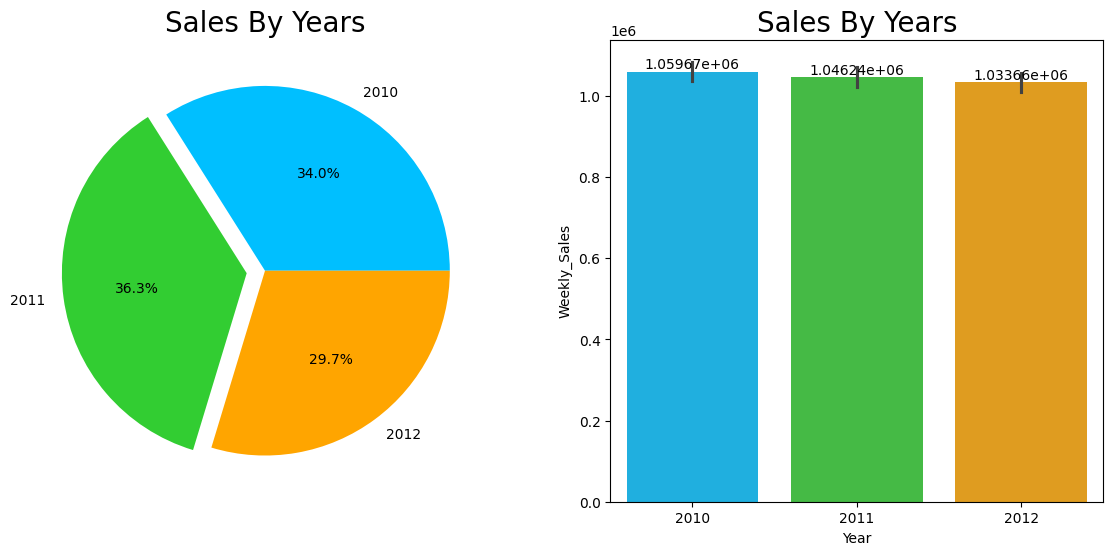

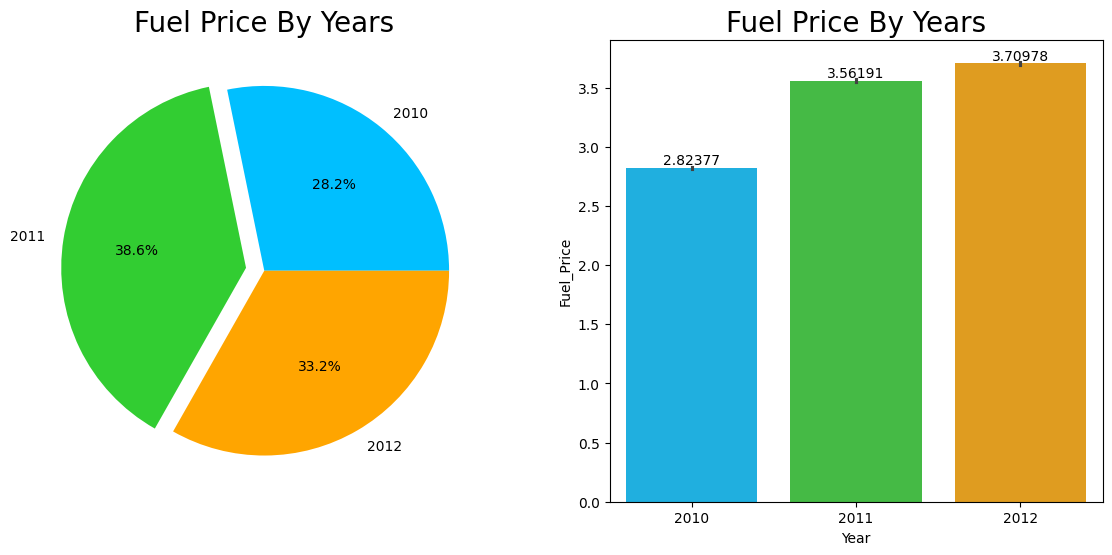

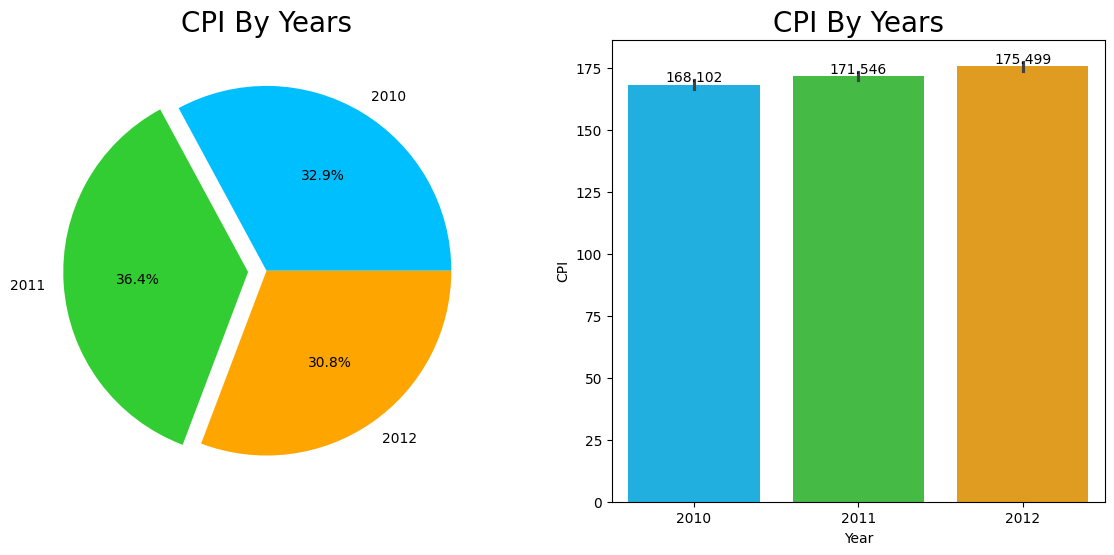

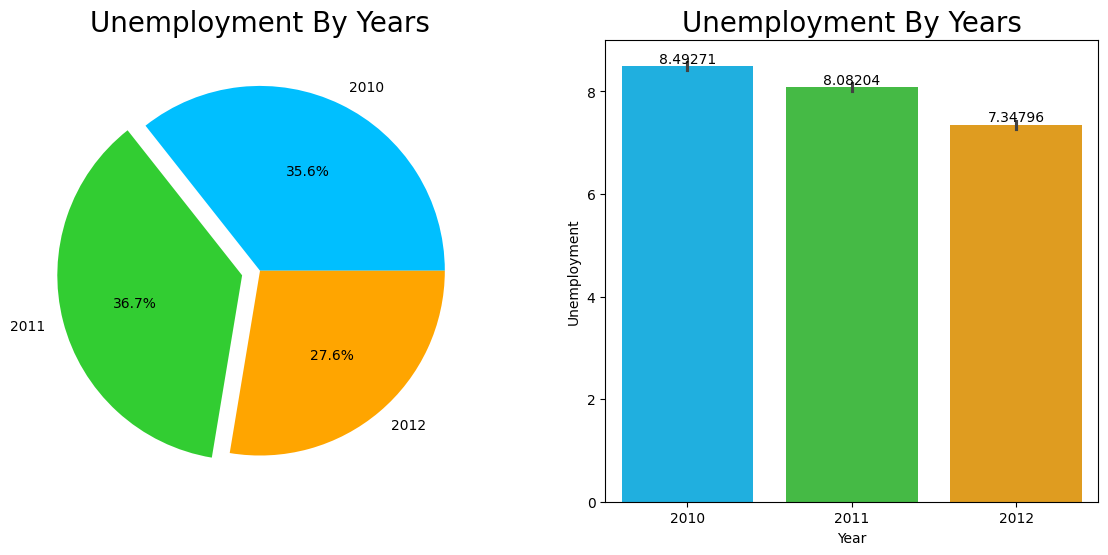

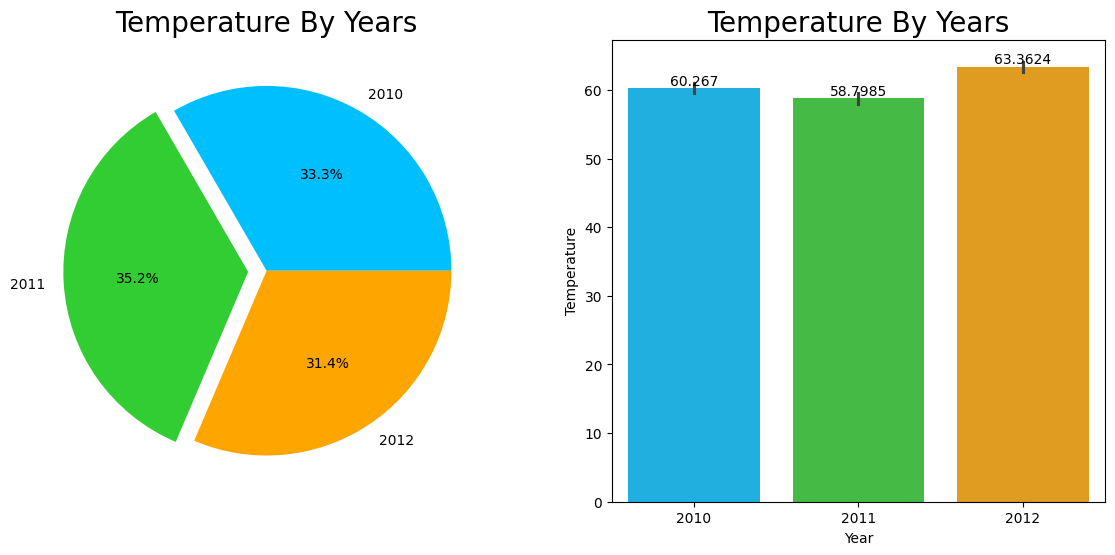

In [23]:
# Pie Chart for Weekly Sales per Year
PieBarChart(data = df_data,
            DateParameter = 'Year',
            NumericParameter = 'Weekly_Sales',
            explode=(0, 0.1, 0),
            save=True,
            path='images/',
            name_file='SalesByYears',
            PieTitle='Sales By Years',
            BarTitle='Sales By Years')

# Pie Chart for Fuel Price per Year
PieBarChart(data = df_data,
            DateParameter = 'Year',
            NumericParameter = 'Fuel_Price',
            explode=(0, 0.1, 0),
            save=True,
            path='images/',
            name_file='FuelPriceByYears',
            PieTitle='Fuel Price By Years',
            BarTitle='Fuel Price By Years')

# Pie Chart for CPI per Year
PieBarChart(data = df_data,
            DateParameter = 'Year',
            NumericParameter = 'CPI',
            explode=(0, 0.1, 0),
            save=True,
            path='images/',
            name_file='CPIByYears',
            PieTitle='CPI By Years',
            BarTitle='CPI By Years')

# Pie Chart for Unmployment per Year
PieBarChart(data = df_data,
            DateParameter = 'Year',
            NumericParameter = 'Unemployment',
            explode=(0, 0.1, 0),
            save=True,
            path='images/',
            name_file='UnemploymentByYears',
            PieTitle='Unemployment By Years',
            BarTitle='Unemployment By Years')

# Pie Chart for Temperature per Year
PieBarChart(data = df_data,
            DateParameter = 'Year',
            NumericParameter = 'Temperature',
            explode=(0, 0.1, 0),
            save=True,
            path='images/',
            name_file='TemperatureByYears',
            PieTitle='Temperature By Years',
            BarTitle='Temperature By Years')

## MonthComparison

In [24]:
from pandas.api.types import CategoricalDtype
DataMonth = df_data.groupby(['Month', 'Year'])['Weekly_Sales'].sum().reset_index()

DataMonth.sort_values(by='Weekly_Sales', ascending=False)

Month  Year  Weekly_Sales
6    Dec  2010  2.887605e+08
7    Dec  2011  2.880781e+08
18   Jun  2012  2.406103e+08
5    Aug  2012  2.368508e+08
13   Jul  2010  2.325801e+08
21   Mar  2012  2.315097e+08
0    Apr  2010  2.314124e+08
14   Jul  2011  2.299114e+08
1    Apr  2011  2.265265e+08
31   Sep  2011  2.208477e+08
27   Oct  2010  2.171618e+08
26   Nov  2011  2.101624e+08
25   Nov  2010  2.028534e+08
16   Jun  2010  1.922462e+08
10   Feb  2012  1.920636e+08
8    Feb  2010  1.903330e+08
17   Jun  2011  1.897734e+08
2    Apr  2012  1.889209e+08
24   May  2012  1.887665e+08
4    Aug  2011  1.885993e+08
3    Aug  2010  1.876401e+08
15   Jul  2012  1.875095e+08
22   May  2010  1.867109e+08
9    Feb  2011  1.863313e+08
29   Oct  2012  1.843617e+08
28   Oct  2011  1.832613e+08
19   Mar  2010  1.819198e+08
23   May  2011  1.816482e+08
32   Sep  2012  1.806455e+08
20   Mar  2011  1.793564e+08
30   Sep  2010  1.772679e+08
12   Jan  2012  1.688945e+08
11   Jan  2011  1.637040e+08

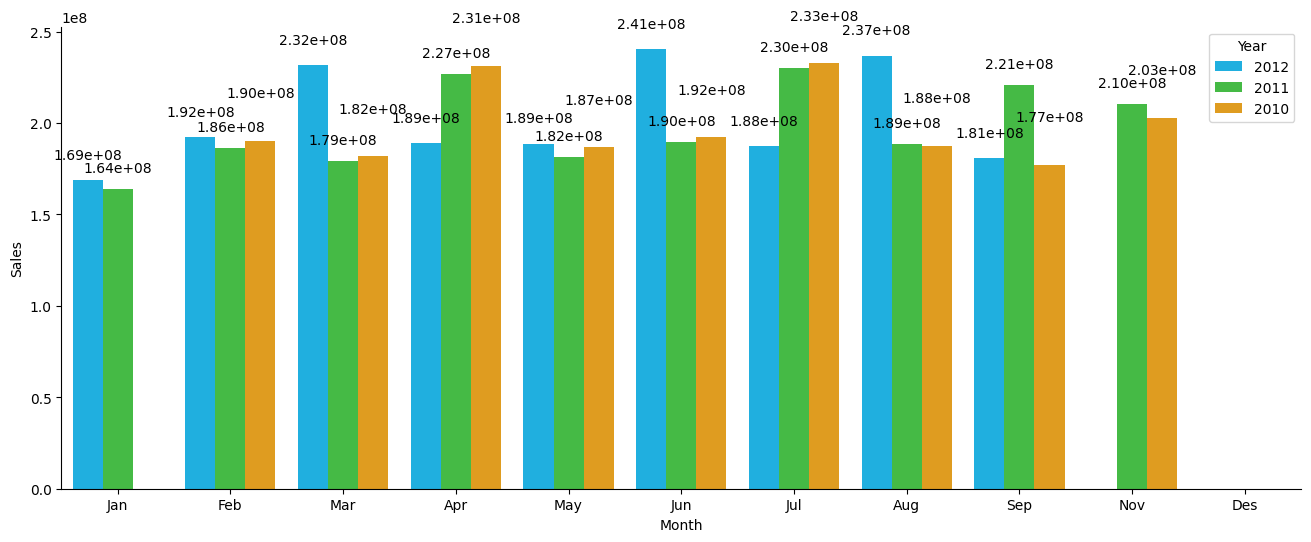

In [25]:
plt.figure(figsize=(16, 6))
MonthOrder = CategoricalDtype(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Nov', 'Des'])
DataMonth['Month'] = DataMonth['Month'].astype(MonthOrder)
DataMonth = DataMonth.sort_values(by='Month')
colors=['#00BFFF',  # Blue Light
        '#32CD32',  # Green Light
        '#FFA500']  # Orange Light
# Make the plot
ax = sns.barplot(data=DataMonth,
                 x='Month',
                 y='Weekly_Sales',
                 hue='Year',
                 palette=colors)

ax.bar_label(ax.containers[0], fmt='%.2e', fontsize=10, label_type='edge', padding=13, zorder=1)
ax.bar_label(ax.containers[1], fmt='%.2e', fontsize=10, label_type='edge', padding=10, zorder=2)
ax.bar_label(ax.containers[2], fmt='%.2e', fontsize=10, label_type='edge', padding=29, zorder=3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('Sales')
plt.savefig('images/SalesByMonthComparison')
plt.show()

In [26]:
fig = px.line(DataMonth,
              x='Month',
              y='Weekly_Sales',
              color='Year')
fig.update_layout(title_text='Month Sales 2010 - 2012',
                  title_x=0.5,
                  title={"font": {"size": 20}}
                         )
fig.show()

In [27]:
df_data.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment Day Month  Year DayOfWeek WeekdayWeekend  
0  211.096358         8.106  05   Feb  2010    Friday        weekday  
1  211.242170         8.106  12   Feb  2010    Friday        weekday  
2  211.289143         8.106  19   Feb  2010    Friday        weekday  
3  211.319643         8.106  26   Feb  2010    Friday        weekday  
4  211.350143         8.106  05   Mar  2010    Friday        weekday

In [28]:
min(df_data['Fuel_Price']), max(df_data['Fuel_Price'])

(2.472, 4.468)

## Weekly

### Sales

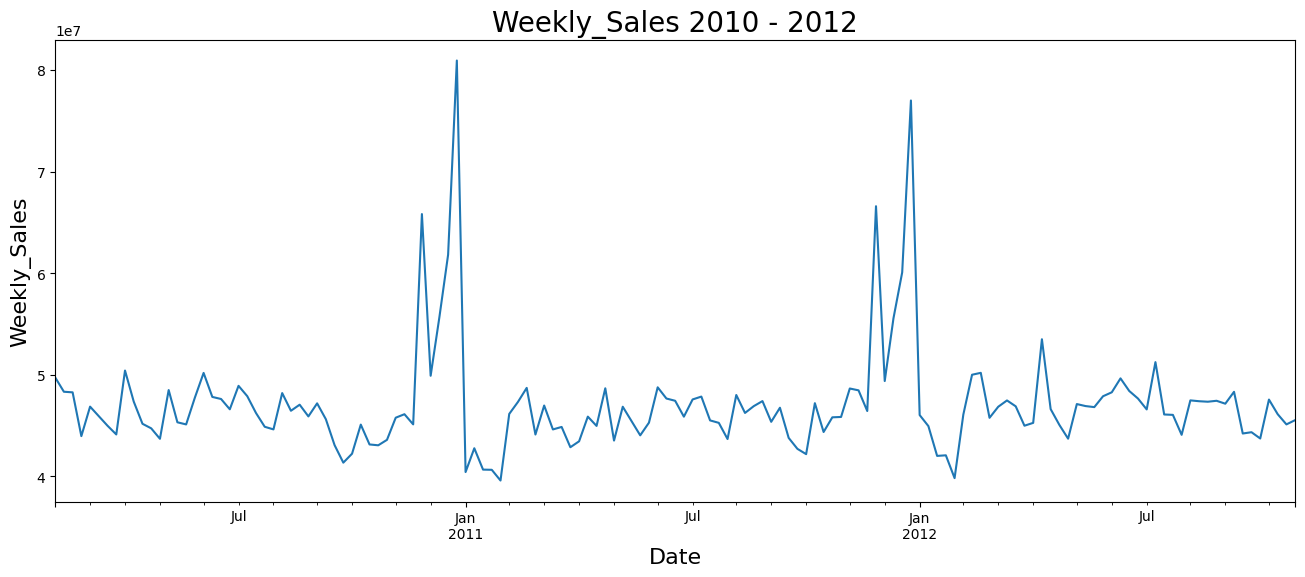

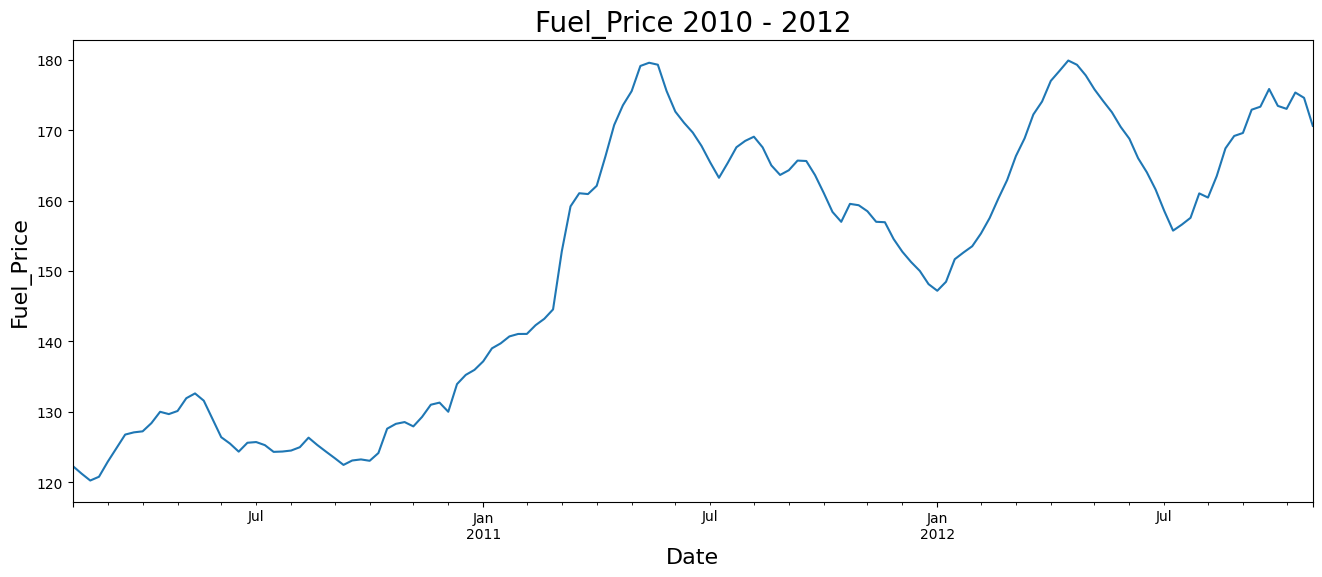

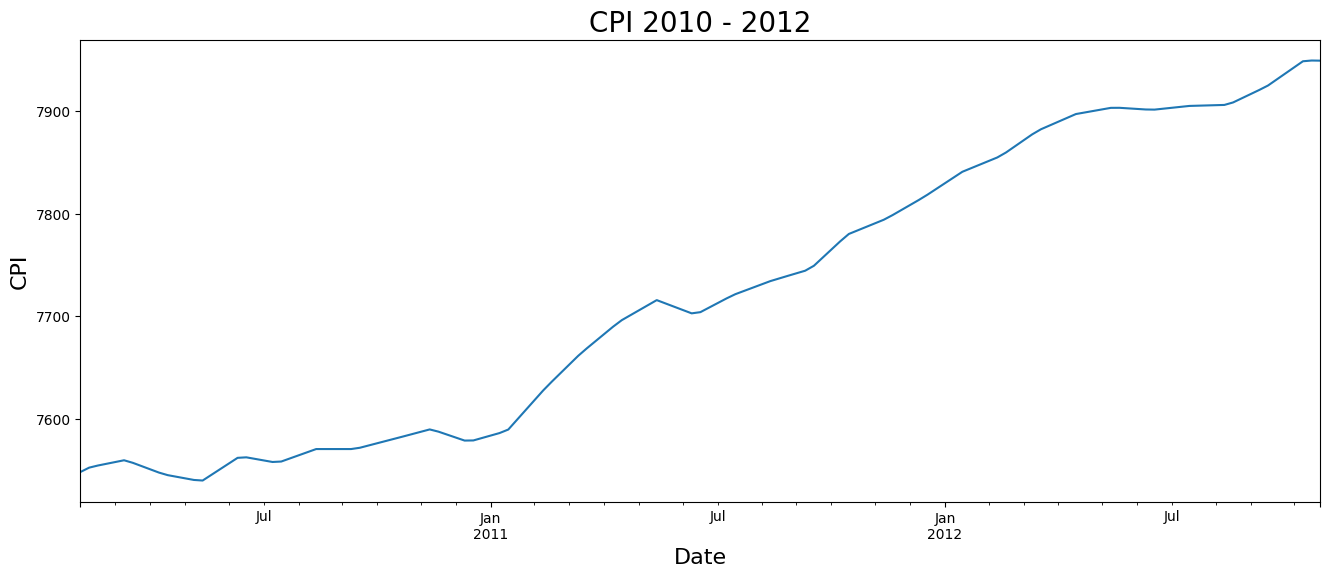

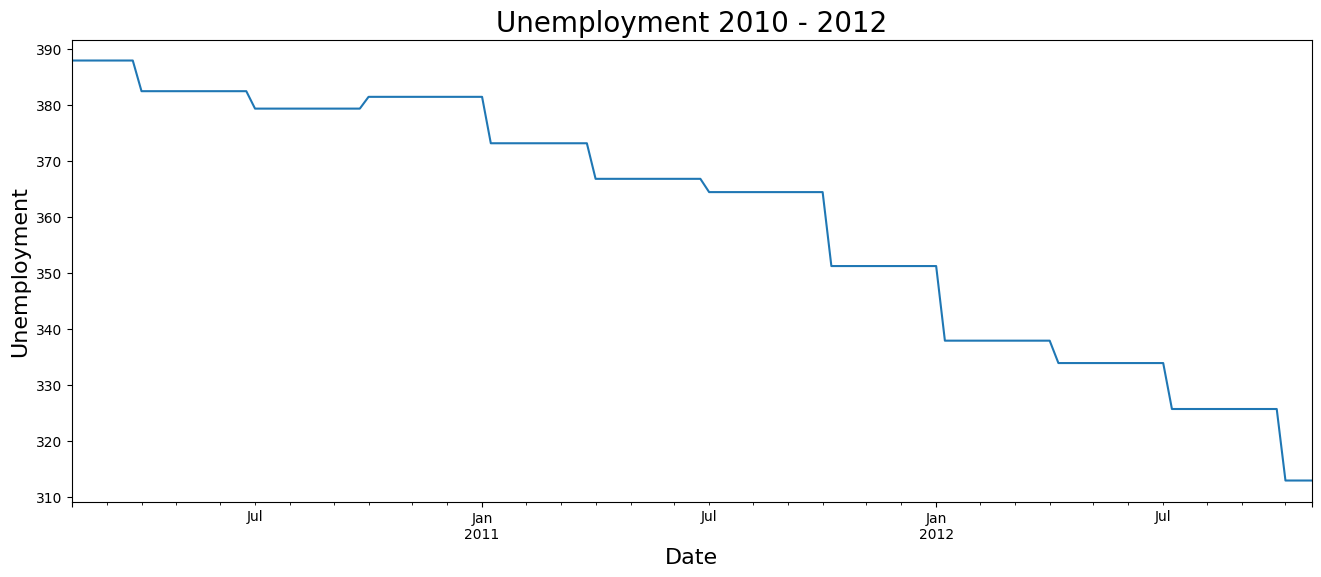

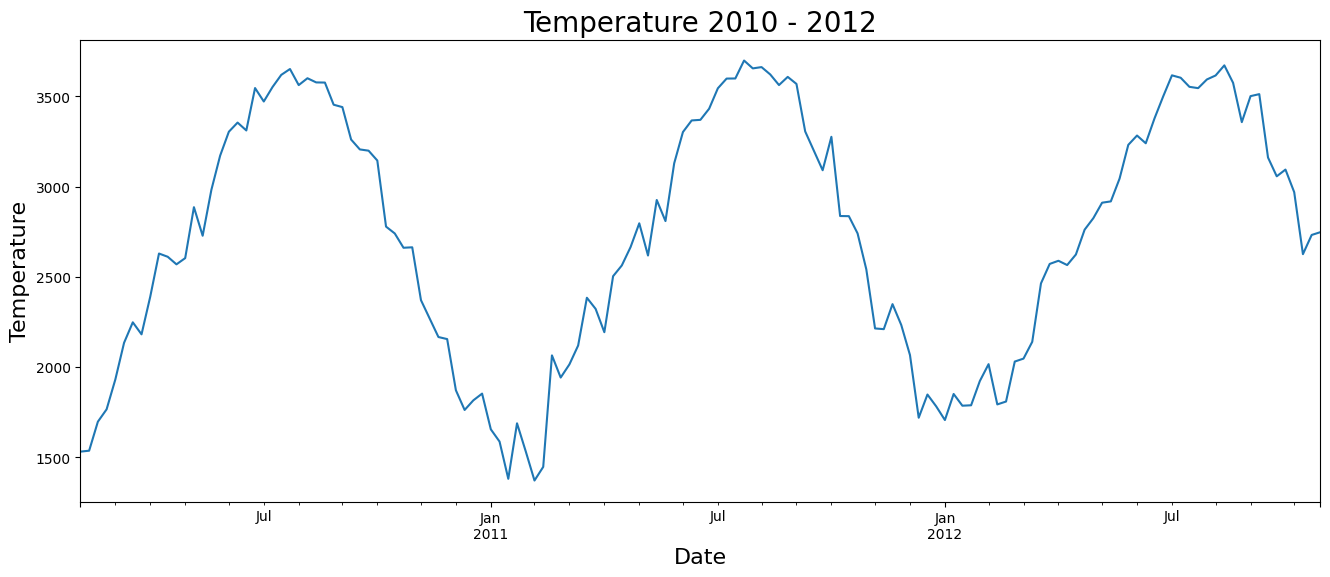

In [29]:
for column in NChartParameter:
    data_copy = df_data.copy()
    LineChart(data=data_copy, 
              DateParameter='W',
              NumericParameter=column,
              LineTitle=column,
              xlabel='Date',
              ylabel=column,
              save=True,
              path='images/',
              name_file='Weekly'+column,
              index='Date')

## Month

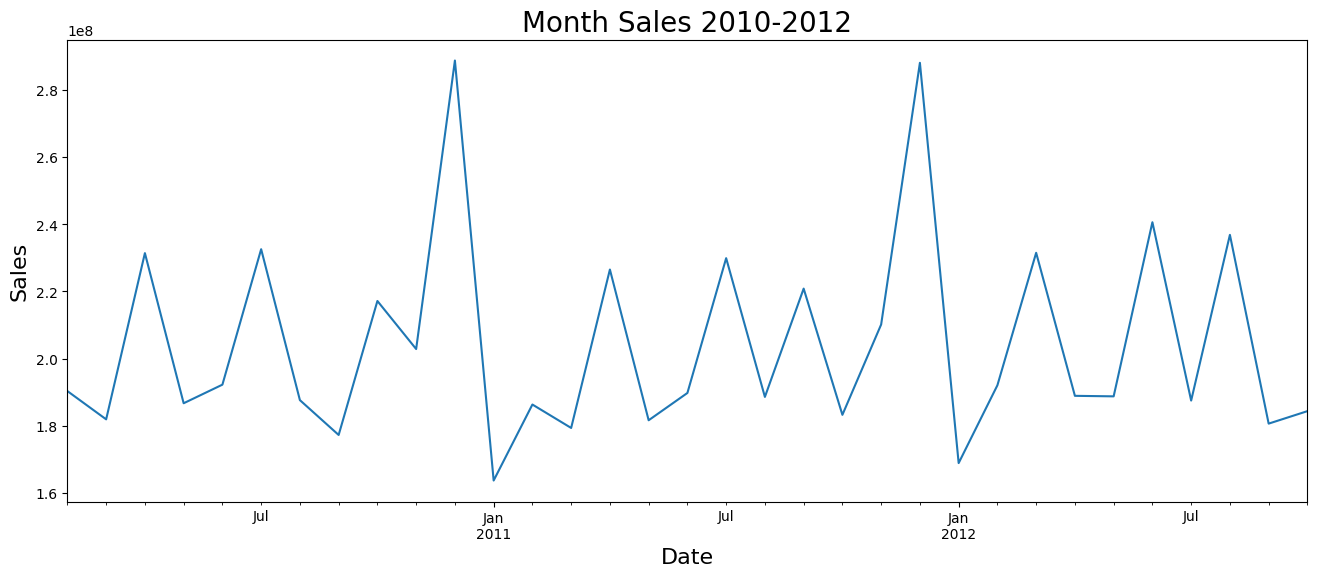

In [30]:
month = df_data.copy()
month.set_index('Date', inplace=True)

month.resample('M')['Weekly_Sales'].sum().plot(kind='line', figsize=(16,6), legend=None)
plt.title('Month Sales 2010-2012', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.savefig('images/SalesByMonth')
plt.show()

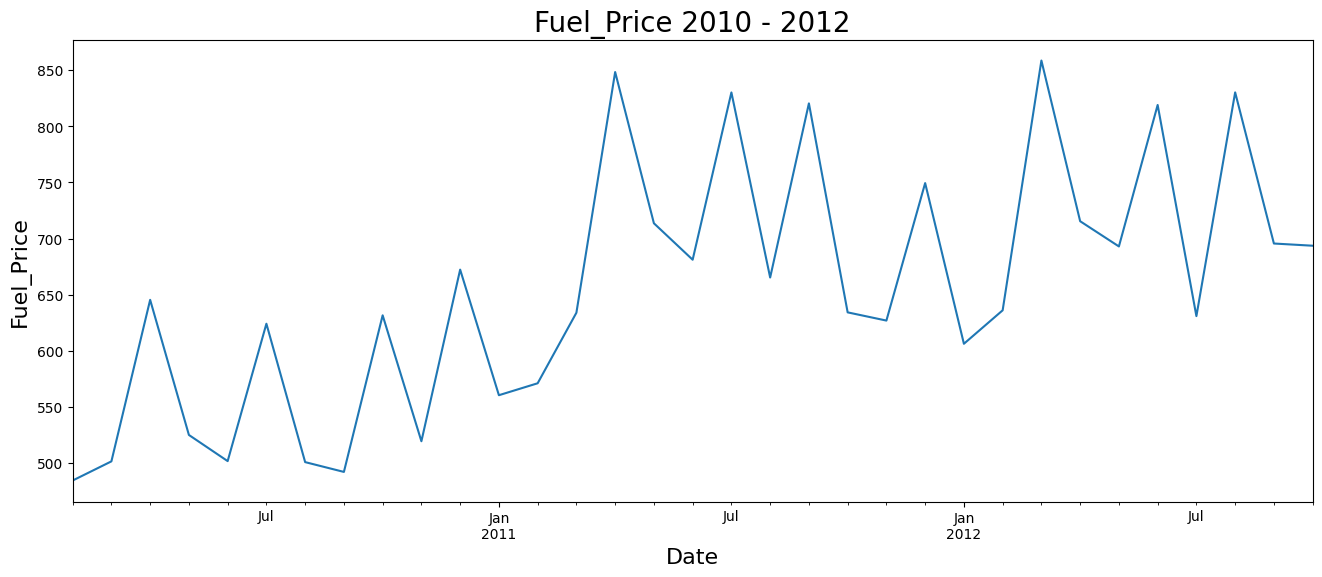

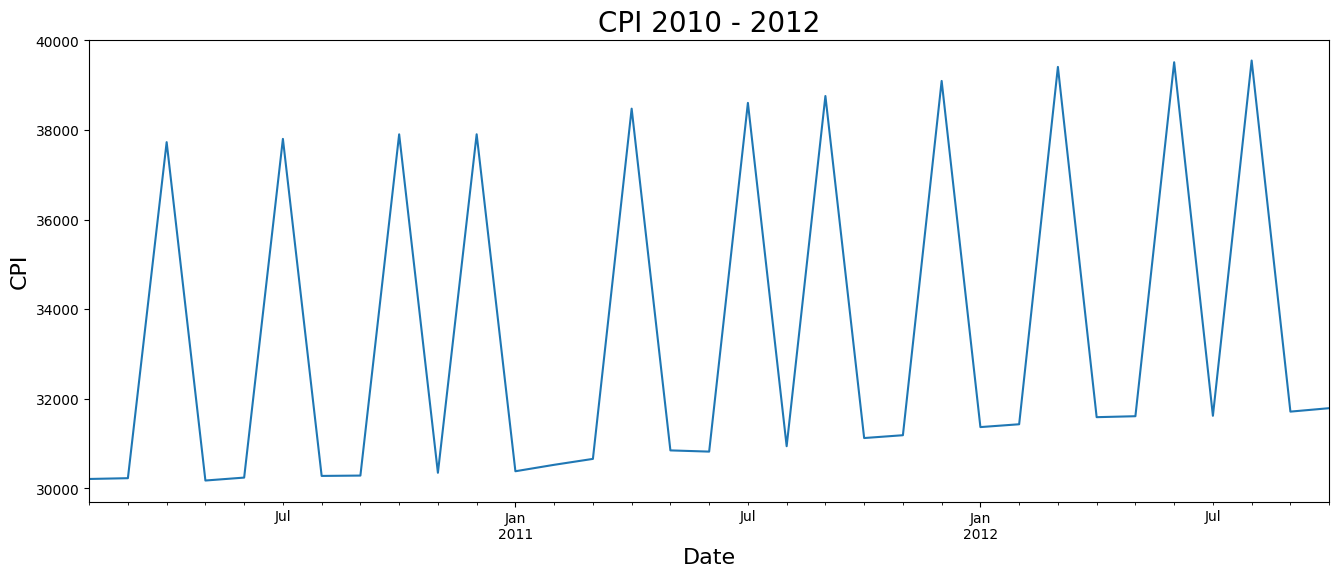

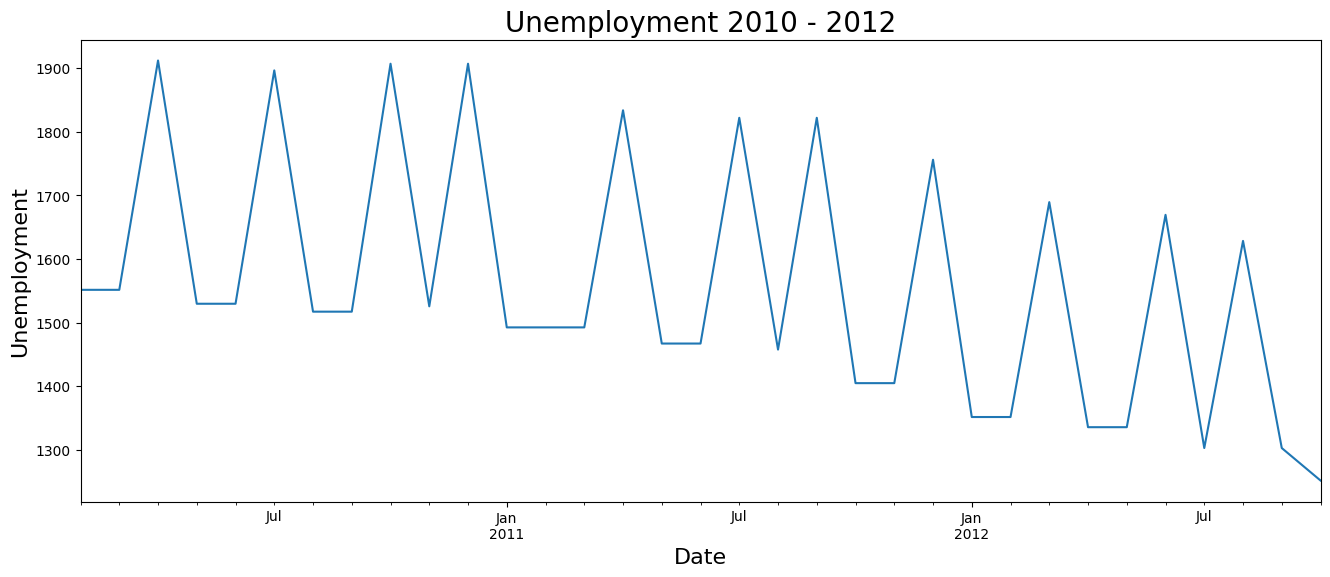

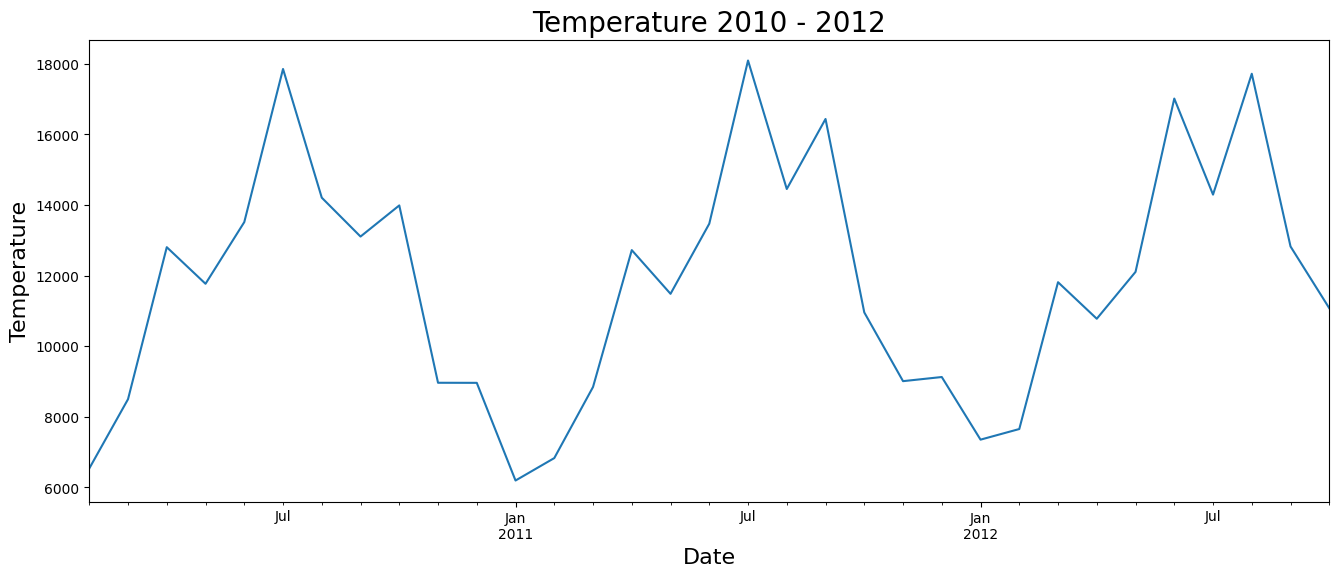

In [31]:
NChartParameter = ['Fuel_Price', 'CPI', 'Unemployment', 'Temperature']
for column in NChartParameter:
    data_copy = df_data.copy()
    LineChart(data=data_copy, 
              DateParameter='M',
              NumericParameter=column,
              LineTitle=column,
              xlabel='Date',
              ylabel=column,
              save=True,
              path='images/',
              name_file='Month'+column,
              index='Date')

In [32]:
df_data.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment Day Month  Year DayOfWeek WeekdayWeekend  
0  211.096358         8.106  05   Feb  2010    Friday        weekday  
1  211.242170         8.106  12   Feb  2010    Friday        weekday  
2  211.289143         8.106  19   Feb  2010    Friday        weekday  
3  211.319643         8.106  26   Feb  2010    Friday        weekday  
4  211.350143         8.106  05   Mar  2010    Friday        weekday

In [40]:
data_matrix = df.drop(df[['Store', 'Date', 'Day', 'Month', 'Year']], axis=1)
data_matrix

Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0       1643690.90             0        42.31       2.572  211.096358   
1       1641957.44             1        38.51       2.548  211.242170   
2       1611968.17             0        39.93       2.514  211.289143   
3       1409727.59             0        46.63       2.561  211.319643   
4       1554806.68             0        46.50       2.625  211.350143   
...            ...           ...          ...         ...         ...   
6430     713173.95             0        64.88       3.997  192.013558   
6431     733455.07             0        64.89       3.985  192.170412   
6432     734464.36             0        54.47       4.000  192.327265   
6433     718125.53             0        56.47       3.969  192.330854   
6434     760281.43             0        58.85       3.882  192.308899   

      Unemployment  
0            8.106  
1            8.106  
2            8.106  
3            8.106  
4            8.106  
...            ...  
6430         8.684  
6431         8.667  
6432         8.667  
6433         8.667  
6434         8.667  

[6435 rows x 6 columns]

In [41]:
corr_matrix = data_matrix.corr()

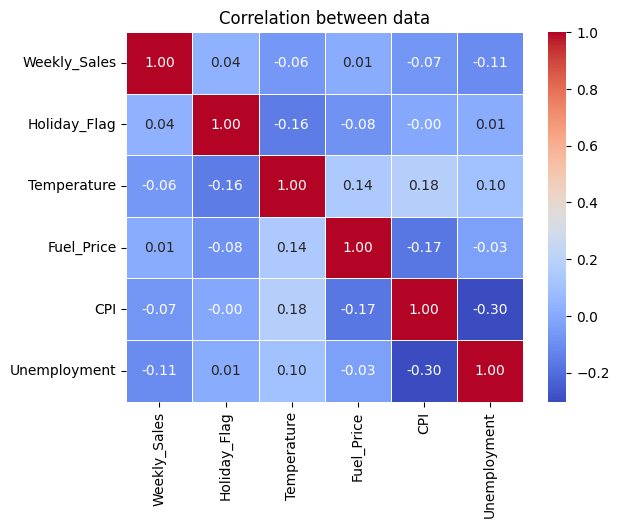

In [42]:
sns.heatmap(corr_matrix, annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=0.5)
plt.title('Correlation between data')
plt.show()